# Movie Recommendation System

Recommender systems are utilized in a variety of areas, and are most commonly recognized as playlist generators for video and music services like Netflix, YouTube and Spotify, product recommenders for services such as Amazon, or content recommenders for social media platforms such as Facebook and Twitter.
<br>
Recommender systems usually make use of either or both <b>Collaborative Filtering</b> or <b> Content-Based filtering approach. 

![](http://miro.medium.com/max/1600/1*dMR3xmufnmKiw4crlisQUA.png)

Here we will be recommending movies to the users who have watched movie 'Jurassic Park (1993)' using <b> Collaborative Filtering</b>

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import the data set

Importing the rating data set which contains ratings given by the users to the movies they watched.

In [2]:
rating = pd.read_csv('../input/movielens-latest-small/ratings.csv')

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Importing the movie dataset which contains the description about all the movies

In [4]:
movies = pd.read_csv('../input/movielens-latest-small/movies.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Let's merge both the dataset so that in ratings dataset we have complete information about the movies apart from the movie id.

In [6]:
# merging both the datasets on 'movieId' column
movie_rating = pd.merge(left=rating,right=movies,on='movieId')

In [7]:
movie_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
movie_rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

Getting the columns of the movie_rating dataframe in proper order

In [9]:
movie_rating = movie_rating[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]

In [10]:
movie_rating.head()

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483


# Exploratory Data Analysis

In [11]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [12]:
movie_rating.isnull().sum()

userId       0
movieId      0
title        0
genres       0
rating       0
timestamp    0
dtype: int64

Let's create a dataframe with number of ratings and average rating for each movie


In [13]:
movie_rating.head(2)

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962


In [14]:
# grouping the movies based on average rating
average_rating_movies = movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False)

In [15]:
average_rating_movies.head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

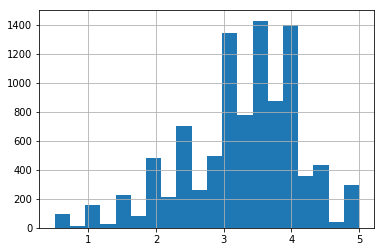

In [16]:
average_rating_movies.hist(bins=20)
plt.show()

Maximum movies have average rating in the range 3 to 4. The movies which have average = 5.0 may be the ones which may have been watched once or twice.

In [17]:
# grouping the movies based on count of users who rated the movies
count_userid = movie_rating.groupby('title')['userId'].count().sort_values(ascending=False)

In [18]:
count_userid

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: userId, Length: 9719, dtype: int64

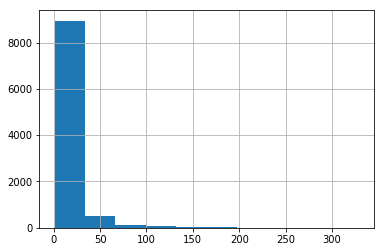

In [19]:
count_userid.hist()
plt.show()

Maximum movies have been viewed in the range 0 - 40 views

The movies which have average = 5.0 may be the ones which may have been watched once or twice. Let's see number of ratings given to movies which have average rating = 5.0

In [20]:
for movie in average_rating_movies[average_rating_movies==5.0].index:
    print(movie,count_userid[movie])

Karlson Returns (1970) 1
Winter in Prostokvashino (1984) 1
My Love (2006) 1
Sorority House Massacre II (1990) 1
Winnie the Pooh and the Day of Concern (1972) 1
Sorority House Massacre (1986) 1
Bill Hicks: Revelations (1993) 1
My Man Godfrey (1957) 1
Hellbenders (2012) 1
In the blue sea, in the white foam. (1984) 1
Won't You Be My Neighbor? (2018) 1
Red Sorghum (Hong gao liang) (1987) 1
Love Exposure (Ai No Mukidashi) (2008) 1
My Sassy Girl (Yeopgijeogin geunyeo) (2001) 1
The Love Bug (1997) 1
Ballad of Narayama, The (Narayama bushiko) (1983) 1
Heidi Fleiss: Hollywood Madam (1995) 2
Louis Theroux: Law & Disorder (2008) 1
Winnie the Pooh Goes Visiting (1971) 1
In the Realm of the Senses (Ai no corrida) (1976) 1
Winnie Pooh (1969) 1
Ex Drummer (2007) 1
Tom Segura: Mostly Stories (2016) 1
Tom and Jerry: A Nutcracker Tale (2007) 1
A Plasticine Crow (1981) 1
Tom and Jerry: Shiver Me Whiskers (2006) 1
Cosmic Scrat-tastrophe (2015) 1
Delirium (2014) 1
Lumberjack Man (2015) 1
Loving Vincent (20

In [21]:
# grouping the movie_rating based on count on userId and mean on rating
userid_rating = movie_rating.groupby('title')[['userId','rating']].agg({'userId':'count','rating':'mean'}).round(2).sort_values(by='userId',ascending=False)

In [22]:
userid_rating.head()

,userId,rating
title,,
Forrest Gump (1994),329,4.16
"Shawshank Redemption, The (1994)",317,4.43
Pulp Fiction (1994),307,4.20
"Silence of the Lambs, The (1991)",279,4.16
"Matrix, The (1999)",278,4.19


# Building Recommendation System

In [23]:
# creating pivot table to create item by item collaborative filtering
movie_rating_pivot = pd.pivot_table(index='userId',columns='title',values='rating',data=movie_rating)

There will be many Nan values because users have watched only few of the movies and given ratings only to those movies

In [24]:
movie_rating_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most Rated movies:

In [25]:
userid_rating.head(10)

,userId,rating
title,,
Forrest Gump (1994),329,4.16
"Shawshank Redemption, The (1994)",317,4.43
Pulp Fiction (1994),307,4.20
"Silence of the Lambs, The (1991)",279,4.16
"Matrix, The (1999)",278,4.19
Star Wars: Episode IV - A New Hope (1977),251,4.23
Jurassic Park (1993),238,3.75
Braveheart (1995),237,4.03
Terminator 2: Judgment Day (1991),224,3.97


Let's find which movies to recommend to the users who have watched 'Jurassic Park (1993)'. 
To do this we have to find correlation of 'Jurassic Park (1993)' with other movies which have been rated in a similar way by the users.

In [26]:
# assigning ratings of movie 'Jurassic Park (1993)' to a new variable from movie_rating_pivot
jurassic_park = movie_rating_pivot['Jurassic Park (1993)'].head(10)

In [27]:
jurassic_park.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     4.0
9     NaN
10    NaN
Name: Jurassic Park (1993), dtype: float64

Find the correlation with other movies from movie_rating_pivot table

In [28]:
correlation_jurassicpark = pd.DataFrame(movie_rating_pivot.corrwith(jurassic_park))

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
correlation_jurassicpark.head()

,0
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN


Removing Nan values and naming the column as 'Correlation'

In [30]:
correlation_jurassicpark.columns = ['Correlation']
correlation_jurassicpark.dropna(inplace=True,axis=0)

In [31]:
correlation_jurassicpark.sort_values(by='Correlation',ascending=True).head()

,Correlation
title,
X-Men (2000),-1.0
Austin Powers: International Man of Mystery (1997),-1.0
Enemy of the State (1998),-1.0
Gladiator (2000),-1.0
Interview with the Vampire: The Vampire Chronicles (1994),-1.0


There may be movies which might have been watched only once or twice by the users who have watched 'Jurassic Park (1993)' and those movies will show high correlation. We will consider only those movies which have been viewed more than 100 times. Let's add views column in the correlation_jurassicpark data frame

In [32]:
correlation_jurassicpark['Views'] = userid_rating['userId']

Now filtering out top 20 movies which have views greater than 100

In [33]:
correlation_jurassicpark[correlation_jurassicpark['Views'] > 100].sort_values(by='Correlation',ascending=False).head(20)

,Correlation,Views
title,,
Jurassic Park (1993),1.000000,238
Mission: Impossible (1996),1.000000,162
Twister (1996),1.000000,123
Speed (1994),1.000000,171
Pretty Woman (1990),1.000000,135
Outbreak (1995),1.000000,101
Toy Story (1995),1.000000,215
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),1.000000,177
GoldenEye (1995),1.000000,132
